In [1]:
# ERA5 not available over water
import ee
import xarray as xr
import pandas as pd
import numpy as np
import dask.array as da
import xee
from bbox import * 
from datetime import datetime

# Trigger the authentication flow
ee.Authenticate()

# Initialize the Earth Engine library
ee.Initialize(project='satellite-modeling')

# Define the rectangle that encompasses Louisiana and Texas
bbox = ee.Geometry.Rectangle([lon_min, lat_min, lon_max, lat_max])

start_date = '2023-07-31'
end_date = datetime.now().strftime('%Y-%m-%d')

In [4]:
no2_hours = pd.read_csv("../../data/tempo_data/no2_file_hours.csv")
no2_hours=list(no2_hours['time_hr_ct'])
time_list = np.array(no2_hours, dtype="datetime64[ns]")

In [5]:
##################################################
# Load GEOS-CF Data
##################################################

# List of climate variables to download from NLDAS
variables =['dewpoint_temperature_2m', 'temperature_2m', 'temperature_of_snow_layer']

# Load NLDAS hourly data and filter by region and date
dataset = ee.ImageCollection("ECMWF/ERA5_LAND/HOURLY") \
            .filterDate(start_date, end_date) \
            .filterBounds(bbox) \
            .select(variables)

ds = xr.open_dataset(dataset, engine='ee', crs='EPSG:4326', scale=0.01)
# Filter the dataset based on the latitude and longitude bounds
ds = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

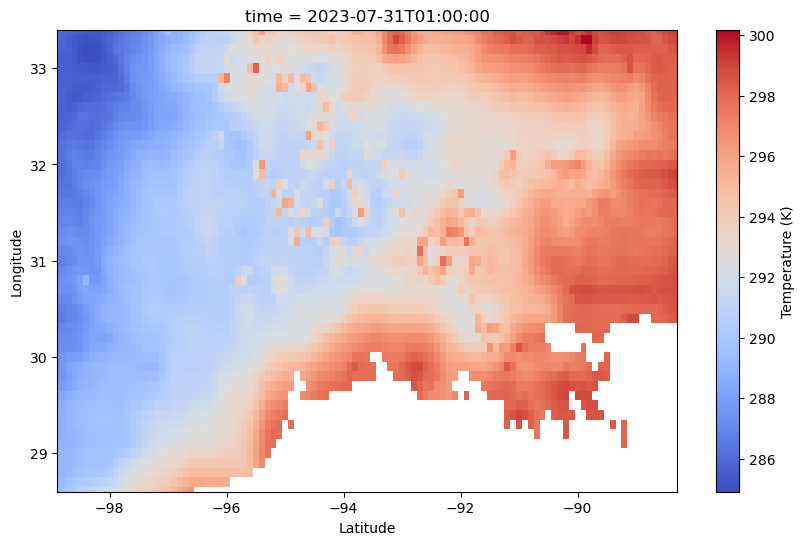

In [7]:
import matplotlib.pyplot as plt

# Select one hour of temperature data (e.g., the first timestamp)
hour_index = 1  # Change this to select a different hour if desired
temperature_data = ds['dewpoint_temperature_2m'].isel(time=hour_index)

# Plot the data with switched axes
plt.figure(figsize=(10, 6))

# Plot with latitude on x-axis and longitude on y-axis
temperature_data.T.plot(
    cmap="coolwarm",  # Colormap for temperature visualization
    cbar_kwargs={'label': 'Temperature (K)'}  # Add color bar label
)

# Update axis labels
plt.xlabel("Latitude")
plt.ylabel("Longitude")

plt.show()